# Entropy in Physics

Entropy, so far, had been a concept in physics. Namely, it is the (log of the) number of microstates or microscopic configurations. 

In simple terms, if the particles inside a system have **many possible positions to move around**, then the system has **high entropy**, and if they have to stay rigid, then the system has **low entropy**

For example, water in its three states, solid, liquid, and gas, has different entropies. The molecules in ice have to stay in a lattice, as it is a rigid system, so **ice has low entropy**. The molecules in water have more positions to move around, so **water** in liquid state has **medium entropy**. The molecules inside water **vapor** can pretty much go anywhere they want, so water vapor has **high entropy**.

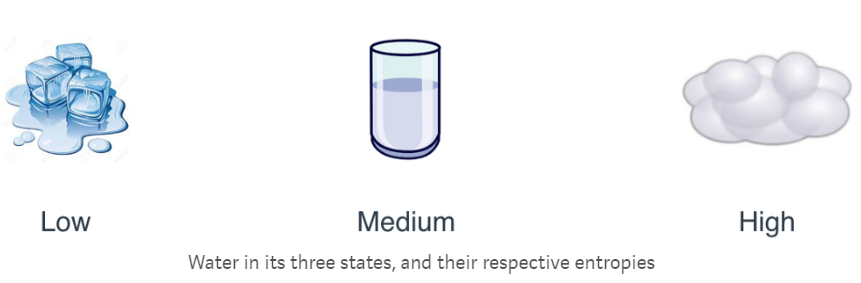

In [21]:
from PIL import Image
Image.open("E:/code/6.MachineLearning/6_Tree_Based_models/img/tree.PNG")

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [3]:
#DecisionTreeClassifier?

# Entropy and Knowledge/Information
To introduce the notion of entropy in probability, we’ll use an example throughout this whole article. Let’s say we have 3 buckets with 4 balls each. The balls have the following colors:

- Bucket 1: 4 red balls
- Bucket 2: 3 red balls, and 1 blue ball
- Bucket 3: 2 red balls, and 2 blue balls

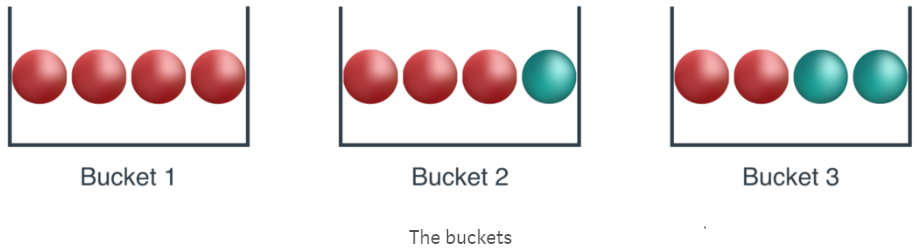

In [5]:
from PIL import Image
Image.open("E:/code/6.MachineLearning/6_Tree_Based_models/img/tree2.PNG")

**If we drawn a ball at random.**



- In the first bucket, we’ll know for sure that the ball coming out is red.
- In the second bucket, we know with 75% certainty that the ball is red, and with 25% certainty that it’s blue.
- In the third bucket, we know with 50% certainty that the ball is red, and with the same certainty that it’s blue.

So it makes sense to say that Bucket 1 gives us the most amount of “knowledge” about what ball we’ll draw (because we know for sure it’s red), that Bucket 2 gives us some knowledge, and that Bucket 3 will give us the least amount of knowledge. 

`Well, Entropy is in some way, the opposite of knowledge`. 

So we’ll say that Bucket 1 has the least amount of entropy, Bucket 2 has medium entropy, and Bucket 3 has the greatest amount of entropy.

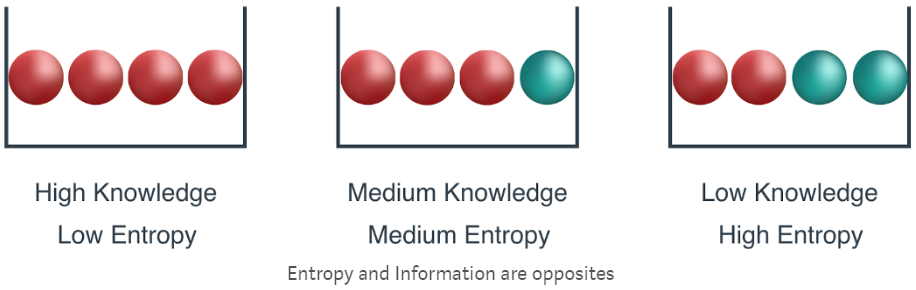

In [8]:
from PIL import Image
Image.open("E:/code/6.MachineLearning/6_Tree_Based_models/img/tree3.PNG")

# Entropy and Probability
So now the question is, how do we cook up a formula which gives us a low number for a bucket with 4 red balls, a high number for a bucket with 2 red and 2 blue balls, and a medium number for a bucket with 3 red and 1 blue balls? Well, as a first attempt, let’s remember the definition of entropy: If molecules have many possible rearrangements, then the system has high entropy, and if they have very few rearrangements, then the system has low entropy. So a first attempt would be to count the number of rearrangements of these balls. In this case, we have 1 possible rearrangement for Bucket 1, 4 for Bucket 2, and 6 for Bucket 3, this number given by the binomial coefficient.

This number of arrangements won’t be part of the formula for entropy, but it gives us an idea, that if there are many arrangements, then entropy is large, and if there are very few arrangements, then entropy is low. In the next section, we’ll cook up a formula for entropy. The idea is, to consider the probability of drawing the balls in a certain way, from each bucket.

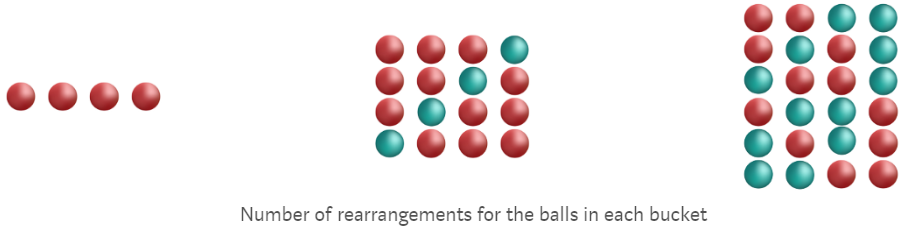

In [9]:
from PIL import Image
Image.open("E:/code/6.MachineLearning/6_Tree_Based_models/img/tree4.PNG")

# Entropy and an Interesting Game Show

So, in order to cook up a formula, we’ll consider the following game. The spoiler is the following: The probability of winning this game, will help us get the formula for entropy.

In this game, we’re given, again, the three buckets to choose. The rules go as follows:

We choose one of the three buckets.
We are shown the balls in the bucket, in some order. Then, the balls go back in the bucket.
We then pick one ball out of the bucket, at a time, record the color, and return the ball back to the bucket.
If the colors recorded make the same sequence than the sequence of balls that we were shown at the beginning, then we win 1,000,000 dollars. If not, then we lose.
This may sound complicated, but it’s actually very simple. Let’s say for example that we’ve picked Bucket 2, which has 3 red balls, and 1 blue ball. We’re shown the balls in the bucket in some order, so let’s say, they’re shown to us in that precise order, red, red, red, blue. Now, let’s try to draw the balls to get that sequence, red, red, red, blue. What’s the probability of this happening? Well…

In order for the first ball to be red, the probability is 3/4, or 0.75.
For the second ball to be red, the probability is again 3/4. (Remember that we put the first ball back in the bucket after looking at its color.)
For the third ball to be red, the probability is again 3/4.
For the fourth ball to be blue, the probability is now 1/4, or 0.25.
As these are independent events, then the probability of the 4 of them to happen, is (3/4)*(3/4)*(3/4)*(1/4) = 27/256, or 0.105. This is not very likely. In the figures below, we can see the probabilities of winning if we pick each of the three buckets.

For exposition, the following three figures show the probabilities of winning with each of the buckets. For Bucket 1, the probability is 1, for Bucket 2, the probability is 0.105, and for Bucket 3, the probability is 0.0625.

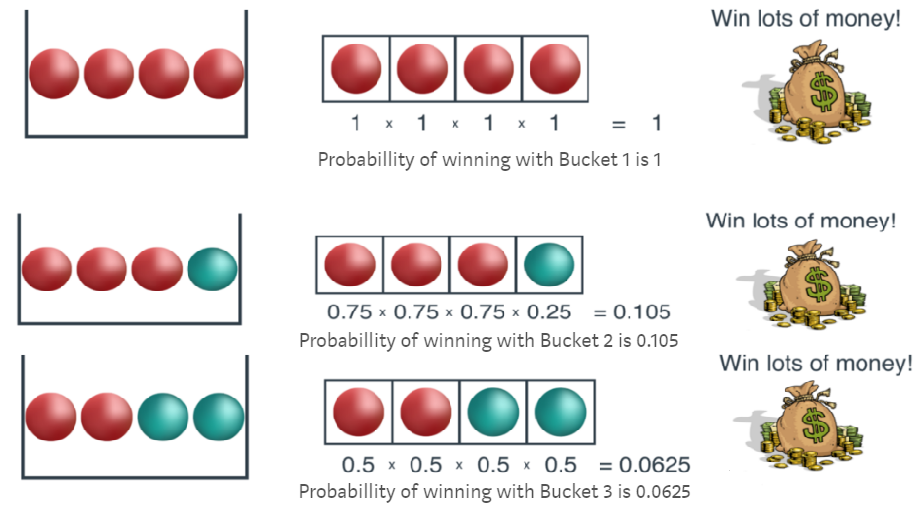

In [10]:
from PIL import Image
Image.open("E:/code/6.MachineLearning/6_Tree_Based_models/img/tree5.PNG")

Probabillity of winning with Bucket 1 is 1

Probabillity of winning with Bucket 2 is 0.105

Probabillity of winning with Bucket 3 is 0.0625

Ok, now we have some measure that gives us different values for the three Buckets. The probability of winning at this game, gives us:

- 1.0 for Bucket 1
- 0.105 for Bucket 2
- 0.0625 for Bucket 3

In order to build the entropy formula, we want the opposite, some measure that gives us a low number for Bucket 1, a medium number for Bucket 2, and a high number for Bucket 3. No problem, this is where logarithms will come to save our life.

# Turning Products into Sums

The following is a very simple trick, yet used very widely, particularly in Machine Learning. See, products are never very good. Here we have a product of 4 numbers, which is not bad, but imagine if we had a million data points. How would the product of a million small probabilities (between 0 and 1) would look? It would be a ridiculously tiny number. In general we want to avoid products as much as we can. What’s better than a product? Well, a sum! And how do we turn products into sums? Exactly, using the logarithm function, since the following identity will be very helpful:

**log(a*b) = log a + log b**


Logarithm identity
So, what do we do? Well, we have a product of four things, we take the logarithm, and that becomes the sum of four things. In the case of Bucket 2 (3 red balls, 1 blue ball), we have the following:

0.75 * 0.75 * 0.75 * 0.25 = 0.10546875


And taking the logarithm (in this case, we’ll take the logarithm, and multiply by -1, to make things positive), we get:

- -log(0.75 * 0.75 * 0.75 * 0.25) = 3.245
- -log(0.75)-log(0.75)-log(0.75)-log(0.25) = 3.245


For purposes of this post, we’ll take logarithm base 2

Now, as a final step, we take the average, in order to normalize. And that’s it, that’s the entropy! For Bucket 2, it’s 0.811:

1/4* (-log(0.75)-log(0.75)-log(0.75)-log(0.25))= 0.81125



If we calculate the entropy **for Bucket 1** (4 red balls), we get:

1/4* (-log(1)-log(1)-log(1)-log(1))=0

And for Bucket 3 (2 red balls, 2 blue balls), we get:

1/4* (-log(0.50)-log(0.5)-log(0.5)-log(0.5))=1


So we have our formula for entropy, **the negative logarithm of the probability** of winning at our game. Notice that this is low for Bucket 1, high for Bucket 3, and medium for Bucket 2. 

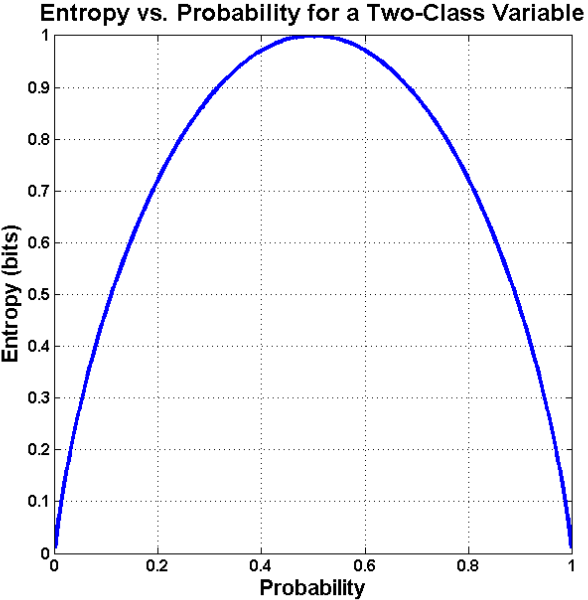

In [12]:
from PIL import Image
Image.open("E:/code/6.MachineLearning/6_Tree_Based_models/img/graph.PNG")


For the formula lovers out there, the general formula is as follows. If our bucket has m red balls, and n blue balls, the formula is as follows:


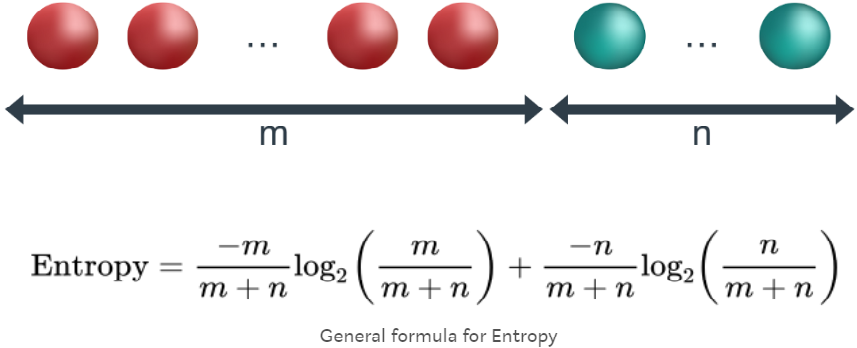

In [11]:
from PIL import Image
Image.open("E:/code/6.MachineLearning/6_Tree_Based_models/img/tree6.PNG")

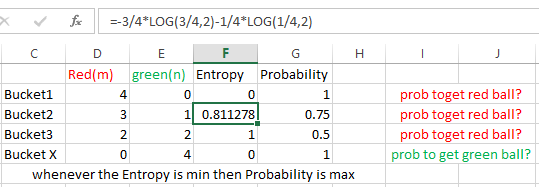

In [16]:
from PIL import Image
Image.open("E:/code/6.MachineLearning/6_Tree_Based_models/img/prob.PNG")

# Multi-class Entropy
So far we’ve been dealing with two classes, red and blue. In order to relate Entropy with Information Theory, we need to look at entropy with several classes. Let’s switch to letters, to make this more clear. We have the following three buckets, with 8 letters each. Bucket 1 has the letters AAAAAAAA, Bucket 2 has the letters AAAABBCD, and Bucket 3 has the letters AABBCCDD. While it’s straightforward to see that Bucket 1 has the least amount of entropy, the difference between Bucket 2 and Bucket 3 is not obvious. We’ll see below that Bucket 3 has the highest entropy of the three, while Bucket 2 has medium


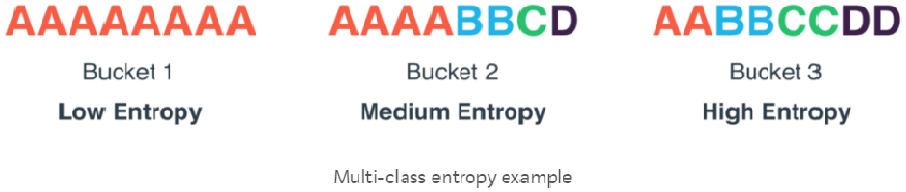

In [14]:
from PIL import Image
Image.open("E:/code/6.MachineLearning/6_Tree_Based_models/img/tree7.PNG")

The formula for entropy generalizes very easily to more classes. This is the general formula

$ Entropy = - \sum_{i=1}^{n} p_{i} * {\log_2 p_{i}}$

Where there are n classes, and $p_{i}$ is the probability an object from the i-th class appearing. For our three buckets, we have the following:

In this case, since Bucket 1 has only one class (the letter A), and the probability of it appearing is 1, then the entropy is:

**For Bucket 1** 

Entropy = -1 * log(1) = 0

**For Bucket 2**:

since we have 4 classes (the letters A, B, C, and D), and the probability of A appearing is 4/8, for B it’s 2/8, for C it’s 1/8, and for D it’s 1/8, then the entropy is:

$ Entropy = -\frac {4}{8} * {\log_2 (\frac{4}{8})}-\frac {2}{8} * {\log_2 (\frac{2}{8})}-\frac {1}{8} * {\log_2 (\frac{1}{8})}-\frac {1}{8} * {\log_2 (\frac{1}{8})} = 1.75$

**For Bucket 3**, since we have 4 classes (the letters A, B, C, and D), and the probability of each appearing is 1/4, then the entropy is:


$ Entropy = -\frac {2}{8} * {\log_2 (\frac{2}{8})}-\frac {2}{8} * {\log_2 (\frac{2}{8})}-\frac {2}{8} * {\log_2 (\frac{2}{8})}-\frac {2}{8} * {\log_2 (\frac{2}{8})} = 2$

Ok, so we’ve calculated the entropy for our three buckets

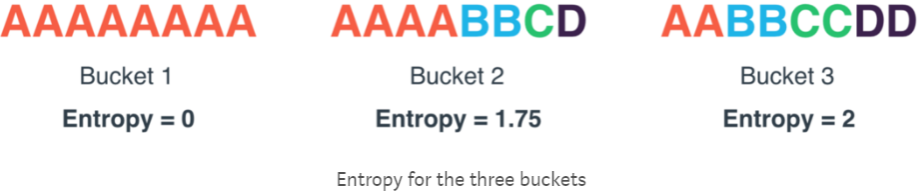

In [15]:
from PIL import Image
Image.open("E:/code/6.MachineLearning/6_Tree_Based_models/img/tree8.PNG")

#### Note: the main objective of Entropy is to find out the Root node(main Column)
- where Entropy is min we take that column as a Root node

# Information Theory
Here’s another way to see entropy. Let’s say we want to draw a random letter from one of the buckets. On average, how many questions do we need to ask to find out what letter it is?

First, let’s get the easy case out of the way. If the bucket is Bucket 1, we know for sure that the letter is an A. So right there, we know that for Bucket 1, we need to ask 0 questions on average, to guess what letter we got. For the sake of redundancy, let’s put it in a formula:

**Average Number of questions = 0**

Now, for buckets 2 and 3, naively, one would think that 4 questions is enough to find out any letter. Namely, the following four questions would be enough:

- Is the letter an A?
- Is the letter a B?
- Is the letter a C?
- Is the letter a D?

So, first off, the fourth question is redundant, since if the answer to all the previous ones is “no”, then we know for sure that the letter is a D. So three questions is enough. Now, can we do better than that? Well, our questions don’t need to be independent. We can tailor our question 2 based on the answer to question 1, as follows:

- Is the letter A or B?

a) If the answer to question 1 is “yes”: Is the letter A? If the answer to question 1 is “no”: Is the letter C?

And that will actually do it, because based on the two answers, we get the following:

- “Yes” and “Yes”: Letter is A
- “Yes” and “No”: Letter is B
- “No” and “Yes”: Letter is C
- “No” and “No”: Letter is D

This tree of questions can be seen in the following image:

Now, for Bucket 3, each letter appears with probability 1/4, since there are 8 letters, and 2 of each. Thus, the average number of questions to find out the letter drawn out of Bucket 2 is precisely 2, as the next formula states:

Average Number of questions = 1/4 * 2 + 1/4 * 2 +1/4 * 2 + 1/4 * 2= 2

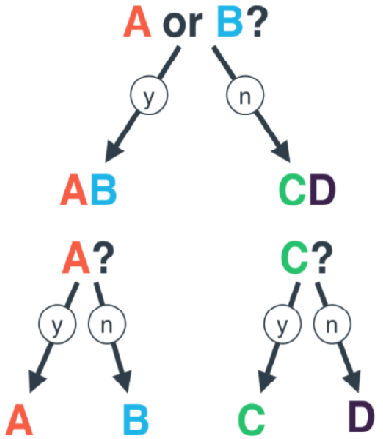

In [19]:
from PIL import Image
Image.open("E:/code/6.MachineLearning/6_Tree_Based_models/img/tree9.PNG")

Now, ** let’s look at Bucket 1**. Of course, if we use the same question tree as we used for Bucket 2, we can see that the average number of questions is 2. But we can do a bit better. Actually, let’s use the first attempt. First asking if the letter is A, then B, then C. That’s the following tree:

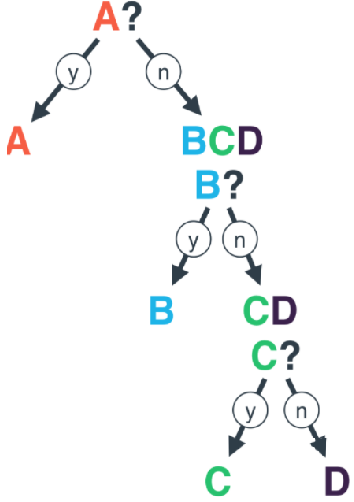

In [20]:
from PIL import Image
Image.open("E:/code/6.MachineLearning/6_Tree_Based_models/img/tree10.PNG")

In this case, we have the following:

- If the letter is A, we found out in 1 question.
- If the letter is B, we found out in 2 questions.
- If the letter is C or D, we found out in 3 questions.

Now the trick is the following. A appears much more often than C and D, so on average, we may be doing much better. How much better? Well, recall that Bucket 2 has the letters AAAABBCD, so A appears 1/2 the time, B appears 1/4 of the time, and C and D appear each 1/8 of the time. So the average number of questions is:

Average Number of questions = 1/2 * 1 + 1/4 * 2 +1/8 * 3+1/8 * 3 =1.75

Well, that’s exactly the entropy! Here’s the connection between Entropy and Information Theory. If we want to find out a letter drawn out of a bucket, the average number of questions we must ask to find out (if we ask our questions in the smartest possible way), is at least the entropy of the set. This means, the entropy of the set is a lower bound on the number of questions we must ask in average to find out. In the cases we saw above, the number of questions is exactly the entropy. In general, this won’t happen, we may need to ask more questions than the entropy. But we will never be able to do it with less questions than the entropy of the set.